In [76]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("./data/labels.csv")

In [3]:
data.head()

,sequence_name,frame_number,label,HeightWidthRatio,MajorMinorRatio,BoundingBoxOccupancy,MaxStdXZ,HHmaxRatio,H,D,P40,image_sample
0,adl-01,6,-1,6.3214,8.2230,0.49455,140.7718,0.95720,1761.2471,927.3002,0.026112,./data/adl_imgs/adl-01-cam0-d-006.png
1,adl-01,8,-1,3.6316,4.5713,0.60584,159.6548,0.77655,1428.8440,818.2913,0.075228,./data/adl_imgs/adl-01-cam0-d-008.png
2,adl-01,9,-1,4.8158,5.5638,0.62698,138.9976,0.93626,1722.7250,908.9348,0.085550,./data/adl_imgs/adl-01-cam0-d-009.png
3,adl-01,10,-1,4.5122,5.1677,0.59209,138.3854,0.93194,1714.7726,944.6872,0.045424,./data/adl_imgs/adl-01-cam0-d-010.png
4,adl-01,11,-1,4.1333,4.7776,0.60872,140.1724,0.93203,1714.9402,923.3361,0.072031,./data/adl_imgs/adl-01-cam0-d-011.png


In [8]:
data_with_only_image_dir = data[['image_sample', 'label']]

In [13]:
data_with_only_image_dir.to_csv("./data/data_with_only_image_dir.csv", index=False)

## Checkpoint 1

In [63]:
X = data_with_only_image_dir.image_sample
y = data_with_only_image_dir.label
y = y + 1

In [64]:
def preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=target_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

# Split the data into training and testing sets
X_train_paths, X_test_paths, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the images
X_train_images = preprocess_images(X_train_paths)
X_test_images = preprocess_images(X_test_paths)

In [66]:
print(X_train_images.shape, y_train.shape)

(9235, 224, 224, 3) (9235,)


In [67]:
print(X_test_images.shape, y_test.shape)

(2309, 224, 224, 3) (2309,)


## Create Basic CNN model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output before the fully connected layers
model.add(Flatten())

# Add Fully Connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer with three units for the three labels and softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 128)     

In [70]:
import visualkeras

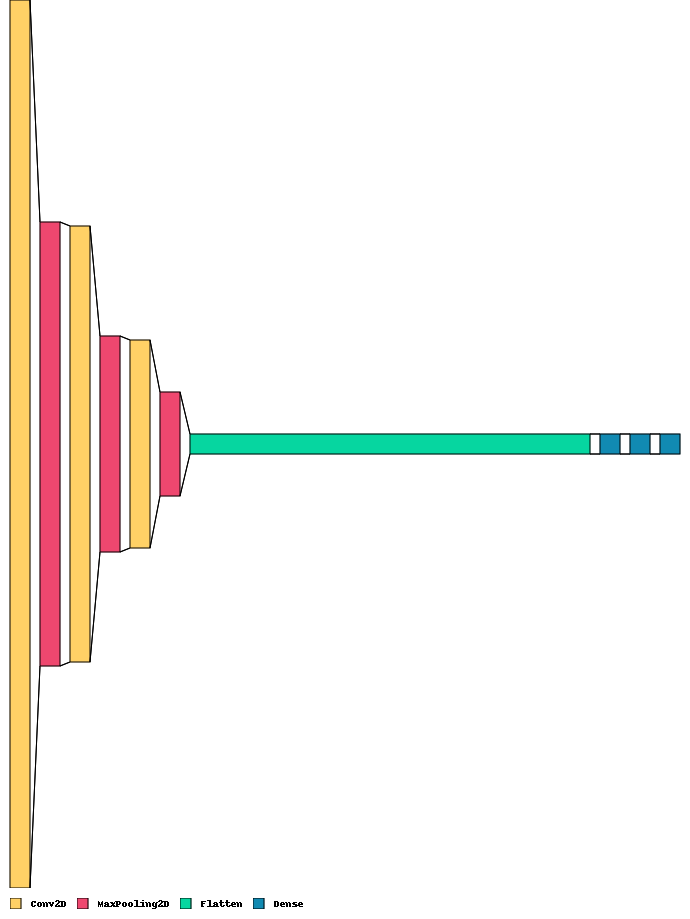

In [71]:
visualkeras.layered_view(model, draw_volume=False, legend=True)

In [72]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_images, y_train, epochs=10, validation_data=(X_test_images, y_test), callbacks=[early_stopping])

Epoch 1/10
289/289 [==============================] - 331s 1s/step - loss: 6.0520 - accuracy: 0.6776 - val_loss: 0.6406 - val_accuracy: 0.6968
Epoch 2/10
289/289 [==============================] - 329s 1s/step - loss: 0.4985 - accuracy: 0.7897 - val_loss: 0.3742 - val_accuracy: 0.8701
Epoch 3/10
289/289 [==============================] - 328s 1s/step - loss: 0.2362 - accuracy: 0.9153 - val_loss: 0.2089 - val_accuracy: 0.9238
Epoch 4/10
289/289 [==============================] - 328s 1s/step - loss: 0.1415 - accuracy: 0.9512 - val_loss: 0.1974 - val_accuracy: 0.9303
Epoch 5/10
289/289 [==============================] - 327s 1s/step - loss: 0.1002 - accuracy: 0.9621 - val_loss: 0.1816 - val_accuracy: 0.9363
Epoch 6/10
289/289 [==============================] - 341s 1s/step - loss: 0.5657 - accuracy: 0.7598 - val_loss: 0.6844 - val_accuracy: 0.6726
Epoch 7/10
289/289 [==============================] - 662s 2s/step - loss: 0.6553 - accuracy: 0.6916 - val_loss: 0.6569 - val_accuracy: 0.6808

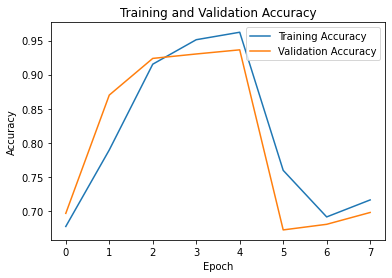

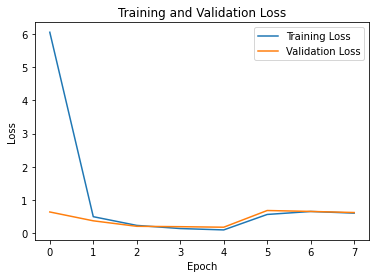

In [78]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

73/73 [==============================] - 18s 248ms/step
Accuracy on the testing set: 93.63%


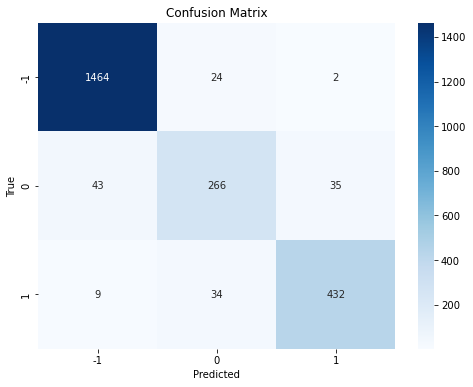

In [77]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy on the testing set: {accuracy * 100:.2f}%")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()